## **Descenso de gradiente**

En este tercer y último notebook del día, abordaremos el tema *descenso de gradiente*.

Para ello, debemos hablar de la `función de costo`. Esta función mide el costo -variable dependiente- en relación a parámetros -variable independiente-. En Data Science, las funciones de costo suelen ser las que calculan el error de ajustar nuestros datos por un modelo.

Una vez que se cuenta con esa función, el objetivo radica en encontrar el mínimo de esta función. Es decir, encontrar los parámetros que corresponden al menor costo. Estos parámetros usualmente está asociados al mejor modelo que ajusta nuestros datos.

Hay tres opciones para optimizar una función de costo:

1. Solución exacta

2. Fuerza bruta -similar a grid search-

3. Hacer una búsqueda guiada

La tercera opción busca el mínimo del costo de una manera inteligente. Esto es lo que hace el descenso por gradiente.

`Descenso por gradiente`

Técnica que se utiliza para encontrar el mínimo de una función. Consiste en un proceso iterativo, cuyos pasos se detallan a continuación:

1. Selecciona un punto aleatorio de la curva. Es decir, elige una combinación de parámetros al azar y evalúa la función de costo allí

2. Fija en qué dirección el costo es descendente

3. Realiza un paso en esa dirección

4. Repite los puntos 2 y 3 cuantas veces sea necesario

Cuando evalúa que en todas las direcciones la curva es ascendente, deducimos que estamos en el mínimo.

Ahora bien, podemos estar ante un mínimo local o global. Para determinarlo, debemos empezar desde distintos puntos aleatorios para ver hacia donde convergen.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/510px-Extrema_example_es.svg.png?20110715160502">

**Derivada**: indica la pendiente de la función en ese punto. Nos sirve para encontrar los mínimos. Si la función es multidimensional, debemos calcular derivadas parciales para cada uno de nuestros parámetros. Cada uno de esos valores nos dirá cuál es la pendiente en el eje de dicho parámetro. Conjuntamente, todas esas derivadas parciales conforman un vector que nos indica la dirección hacia la que la pendiente asciende. Este vector se denomina **`gradiente`**.

**Ratio de aprendizaje**: parámetro que define cuánto afecta el gradiente a la actualización de nuestros parámetros en cada iteración. Es decir, cuánto avanzamos en cada paso. Va a definir completamente el comportamiento de nuestro algoritmo.

<img src = ./_src/assets/confuso.jpg>

Si todas estas nuevas apreciaciones que estamos estudiando te resultan un poco confusas, el siguiente [video](https://www.youtube.com/watch?v=A6FiCDoz8_4&t=2s&ab_channel=DotCSV) puede ayudarte a abordarlos de una forma más dinámica.

- - -

## Práctica

Primero, vamos a introducir una función de costo para una función lineal $y = 2x - 3$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import random

In [2]:
x = np.linspace(-1,1,100)
m_0 = 2 # Valor verdadero de la pendiente
b_0 = -3 # Valor verdadero de la ordenada al origen
y = m_0*x + b_0 + 0.25*np.random.randn(x.size) # Incorporamos ruido

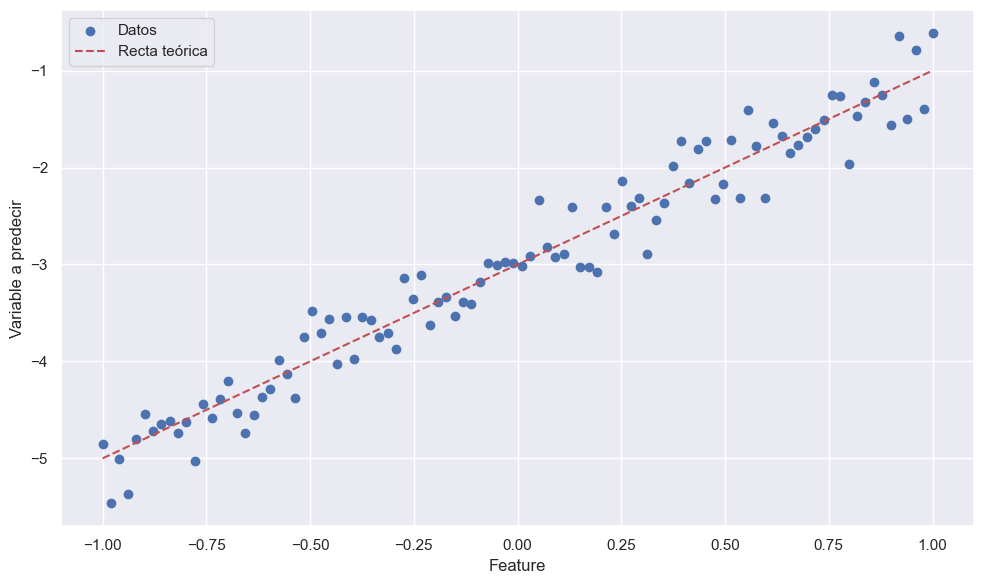

In [3]:
plt.figure(figsize = (10,6))
plt.scatter(x,y, label = 'Datos')
plt.plot(x, m_0*x + b_0, '--', c = 'r', label = 'Recta teórica')
plt.ylabel('Variable a predecir')
plt.xlabel('Feature')
plt.legend()
plt.tight_layout()
if False:
    plt.savefig('Datos_ajuste_.png', dpi= 400)
plt.show()

En general, uno tiene ciertos datos y de esos datos quiere estimar los valores del modelo. En este caso, la pendiente y ordenada al origen de la recta. La hipótesis que vamos a utilizar es que la recta que mejor aproxime los datos va a ser la recta teórica que genera los datos.

Pero, para definir la recta que mejor aproxime los datos, tenemos que cuantificar qué es, precisamente, aproximar bien. Para ello usamos una métrica. En este caso, MSE.

In [4]:
def MSE(y,y_pred):
    '''Calcula MSE'''
    assert(len(y) == len(y_pred))
    n = len(y)
    return ((y - y_pred)**2).sum()/n

#### **`Un parametro libre`**

Supongamos que conocemos la ordenada al origen $b$, y solamente tenemos que obtener la pendiente $m$. Lo que podemos hacer entonces es *barrer* distintos valores para $m$ y ver a cuál corresponde el mínimo del costo. **Importante**: en este caso, la función de costo depende de un único parámetro, $m$.

In [5]:
%%time
m_s = np.linspace(-5,5,1000)
b = -3
costos = []
for m in m_s:
    y_pred = m*x + b
    costos.append(MSE(y,y_pred))

costos = np.array(costos)

CPU times: total: 0 ns
Wall time: 11 ms


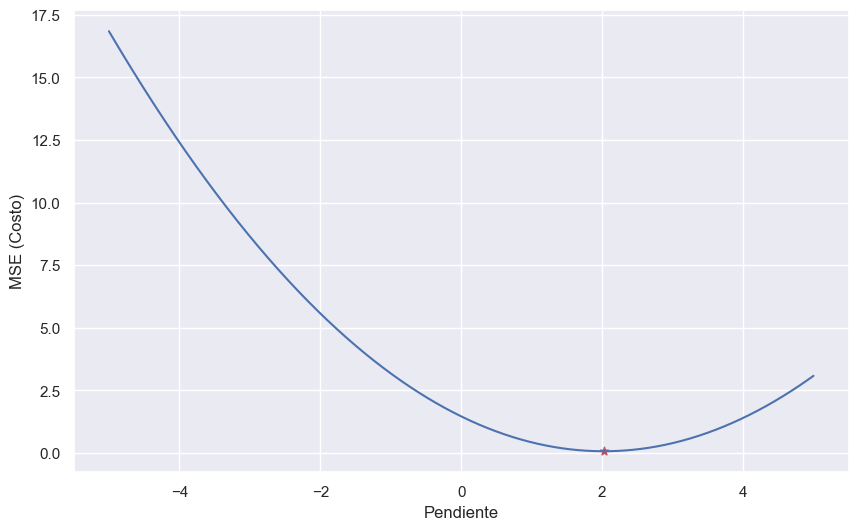

In [6]:
indice_minimo = np.argmin(costos)

plt.figure(figsize = (10,6))
plt.plot(m_s, costos)
plt.scatter(m_s[indice_minimo], costos[indice_minimo], marker = '*', c = 'r')
plt.xlabel('Pendiente')
plt.ylabel('MSE (Costo)')
plt.show()

#### **`Dos parámetros libres`**

Antes de continuar, piensa qué modificarían en el caso de tener que encontrar no uno sino dos parámetros libres. Es decir, $m$ y $b$. En este caso, ¿de cuántos parámetros depende la función de costo?¿Cómo será su visualización?

In [7]:
m_s = np.linspace(-5,5,500)
b_s = np.linspace(-5,0,500)

In [8]:
%%time
costos = []
for m in m_s:
    for b in b_s:
        y_pred = m*x + b
        costos.append(MSE(y,y_pred))
costos = np.array(costos)

CPU times: total: 3.25 s
Wall time: 5.54 s


In [9]:
Ms, Bs = np.meshgrid(m_s,b_s, indexing = 'ij')
costos_matriz = costos.reshape(m_s.size, b_s.size)

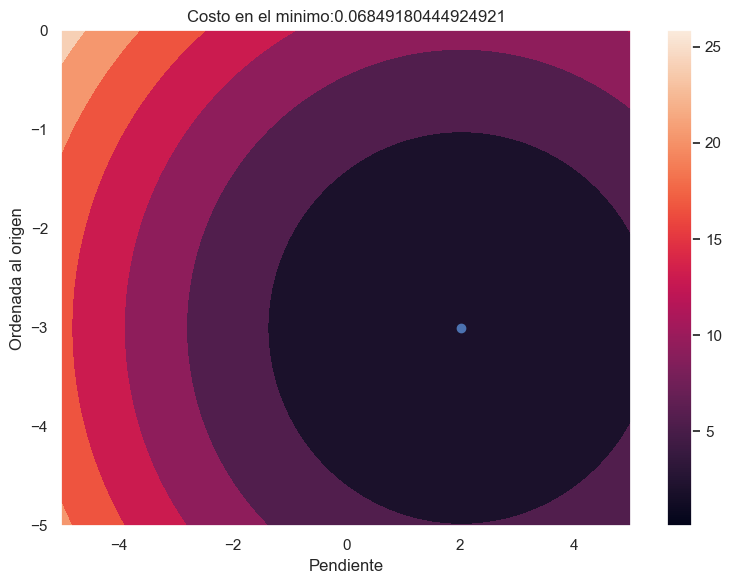

In [10]:
idxs_minimo = np.unravel_index(costos_matriz.argmin(), costos_matriz.shape)
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,costos_matriz)
ax.contourf(Ms, Bs, costos_matriz)
plt.colorbar()
plt.scatter(Ms[idxs_minimo], Bs[idxs_minimo])
plt.title('Costo en el minimo:' + str(costos_matriz[idxs_minimo]))
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

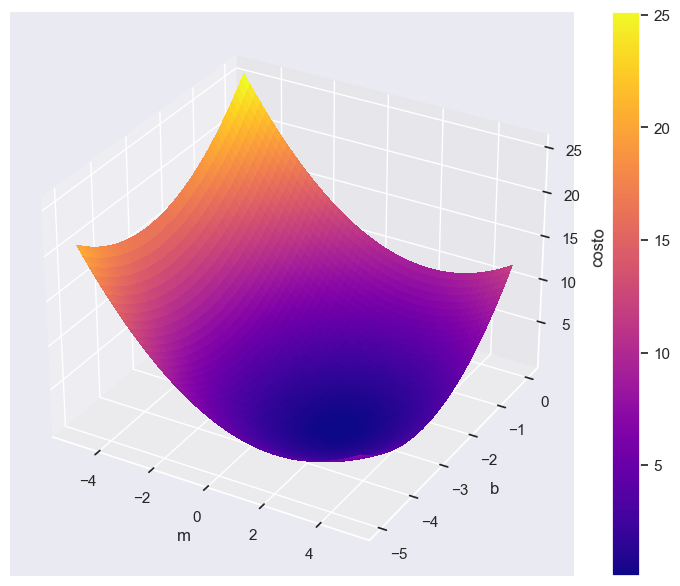

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(Ms, Bs,costos_matriz,linewidth=0.0, antialiased=False, cmap = 'plasma')
# ax.view_init(0, 180)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('costo')
plt.tight_layout()
plt.colorbar(surf)    
# plt.savefig('costo_3d.png', dpi = 400)
plt.show()

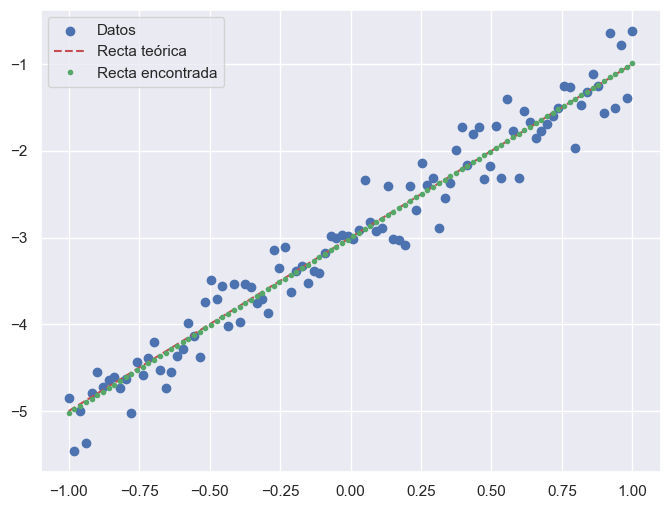

In [12]:
m_encontrado = Ms[idxs_minimo]
b_encontrado = Bs[idxs_minimo]

plt.figure(figsize = (8,6))
plt.scatter(x,y, label = 'Datos')
plt.plot(x, m_0*x + b_0, '--', c = 'r', label = 'Recta teórica')
plt.plot(x, m_encontrado*x +b_encontrado, '.', c = 'g', label = 'Recta encontrada')
plt.legend()
plt.show()

### Descenso por gradiente

Aquí obtendremos la dirección en la cual debemos movernos para llegar al mínimo de la función de costo.

Para hacerlo necesitamos las derivadas. 

La función de costo es función de la pendiente $m$ y la ordenada al origen $b$. Para simplificar, vamos a asumir que después de hacer varios reemplazos y algunas cuentas, la función de costo tiene la siguiente forma:

$$MSE(m, b) = (m-2)^2 + (b+3)^2$$

¿Están de acuerdo que el mínimo se obtiene para $m = 2$ y $b = -3$? Si no estás de acuerdo, discutir con un/a compañero/a hasta que lo estés.

Escribimos la función MSE, sus derivadas y el gradiente.


In [13]:
def MSE_m_y_b(m,b):
    return (m-2)**2 + (b+3)**2

def der_MSE_m(m,b):
    '''Derivada de MSE respecto a m'''
    return 2*(m-2)

def der_MSE_b(m,b):
    '''Derivada de MSE respecto a b'''
    return 2*(b+3)

def gradiente(m,b):
    gradiente = np.array([der_MSE_m(m,b), der_MSE_b(m,b)])
    return gradiente

Elegimos un valor al azar para $m$ y otro para $b$ y calculamos el gradiente.

In [14]:
m_prueba = -1 
b_prueba = -2

grad = gradiente(m_prueba, b_prueba)
print(grad)

grad = grad/np.linalg.norm(grad)
print(grad)

[-6  2]
[-0.9486833   0.31622777]


Y ahora graficamos la función de costo menos el gradiente obtenido para el punto elegido.

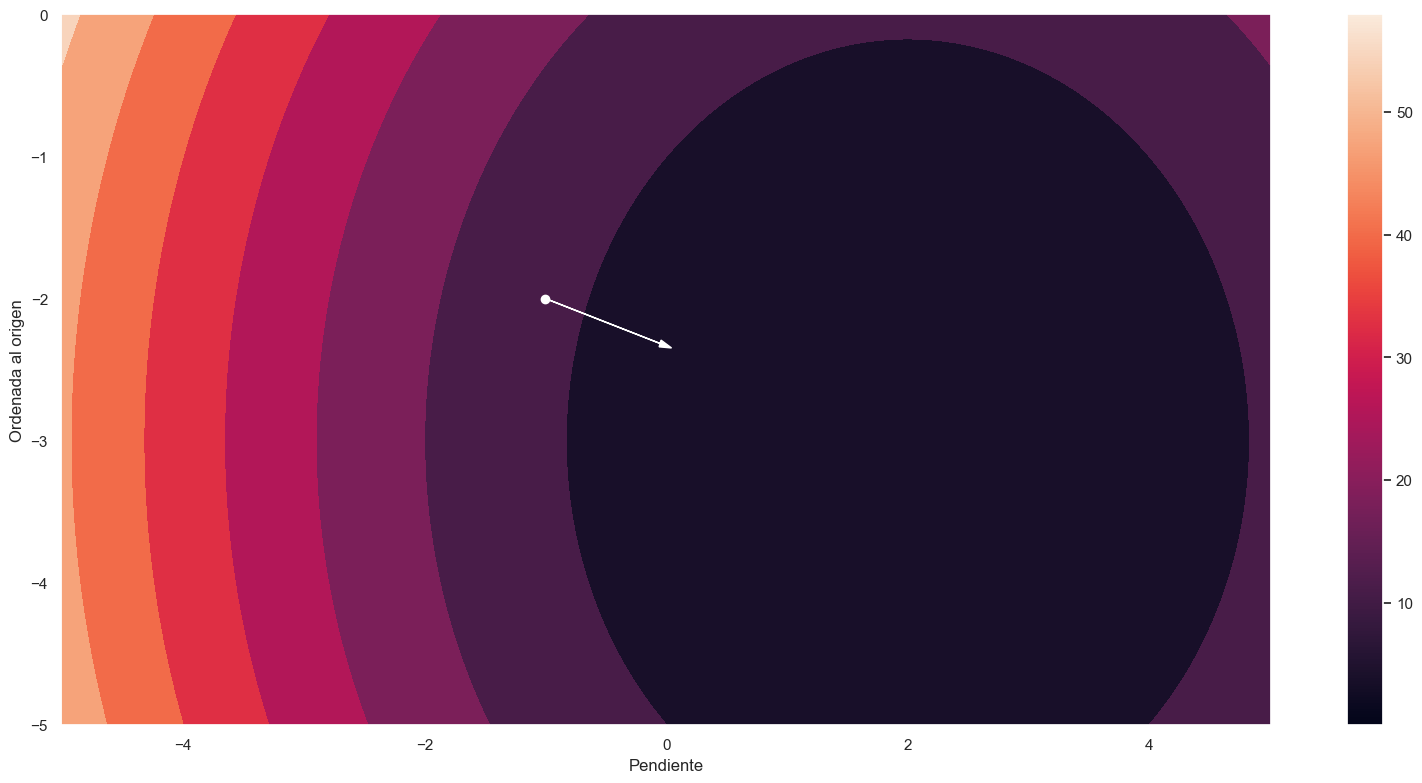

In [15]:
fig = plt.figure(figsize = (16,8))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,MSE_m_y_b(Ms, Bs))
ax.contourf(Ms, Bs, MSE_m_y_b(Ms, Bs))
plt.colorbar()

plt.scatter(m_prueba,b_prueba, c="white")

##Asegurate de entender bien que significan los parámetros: m_prueba,b_prueba, -grad[0] y -grad[1]. ¿Por qué el grad está en negativo?
plt.arrow(m_prueba,b_prueba, -grad[0], -grad[1], head_width=0.05, head_length=0.1, fc='white', ec='white')

plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

Descenso por gradiente consiste entonces en ir haciendo sucesivos pasos, siguiendo la dirección que marca el negativo del gradiente, hasta llegar al mínimo o muy cerca de él. En general:

1. Empezamos con valores aleatorios de los parámetros.

2. Repetimos tantas veces como sea necesario
    1. Calculamos el gradiente (derivadas) de la función de costo respecto al valor actual de los parámetros.
    2. Actualizamos los valores de los parámetros siguiendo menos la derivada para cada uno.
    $$ m_{nuevo} = m_{viejo} - \alpha * \frac{dMSE(m,b)}{dm} $$
    $$ b_{nuevo} = b_{viejo} - \alpha * \frac{dMSE(m,b}{db} $$
      
      
Al **hiperparámetro** $\alpha$ se lo conoce como *learning rate* y lo van a encontrar en casi todos los frameworks donde se implemente descenso por gradiente. Es, sin duda, uno de los principales hiperparámetros en cualquier impolementación.

Lo implementamos. Definimos dónde empezar, cuántos pasos hacer y el *learning rate*.

In [16]:
m = -1   # Por ahora, los elegimos a mano, pero debería ser al azar
b = -1   # Por ahora, los elegimos a mano, pero debería ser al azar

max_steps = 50 # Probar modificar
alpha = 0.1

In [17]:
costos = []
m_obtenidos = []
b_obtenidos = []

for step in range(max_steps):
    costos.append(MSE_m_y_b(m,b))
    m_obtenidos.append(m)
    b_obtenidos.append(b)
    m = m - alpha*der_MSE_m(m,b)
    b = b - alpha*der_MSE_b(m,b)

# Agregamos el ultimo paso que no lo hicimos
costos.append(MSE_m_y_b(m,b))
m_obtenidos.append(m)
b_obtenidos.append(b)

# Llevamos a arreglos
costos = np.array(costos)
m_obtenidos = np.array(m_obtenidos)
b_obtenidos = np.array(b_obtenidos)

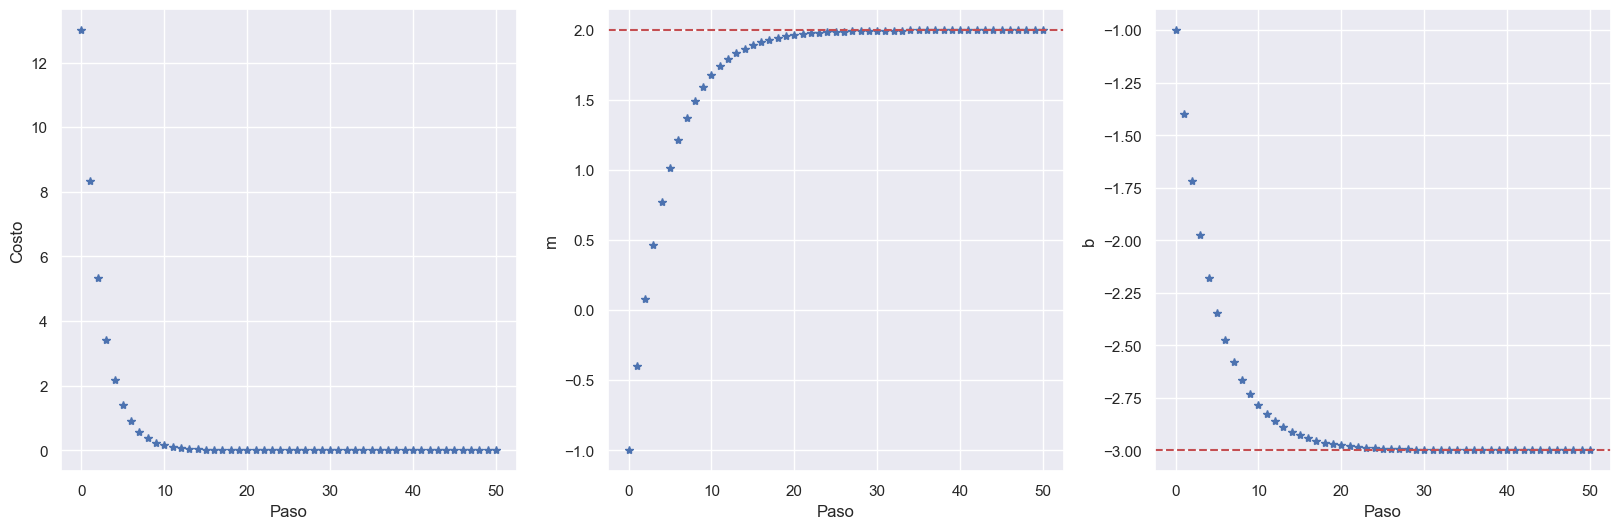

In [18]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.plot(costos, '*')
plt.xlabel('Paso')
plt.ylabel('Costo')

plt.subplot(1,3,2)
plt.plot(m_obtenidos, '*')
plt.axhline(m_0, linestyle = '--', c = 'r', label = 'm real')
plt.xlabel('Paso')
plt.ylabel('m')

plt.subplot(1,3,3)
plt.plot(b_obtenidos, '*')
plt.axhline(b_0,  linestyle = '--', c = 'r', label = 'b real')
plt.xlabel('Paso')
plt.ylabel('b')

plt.show()

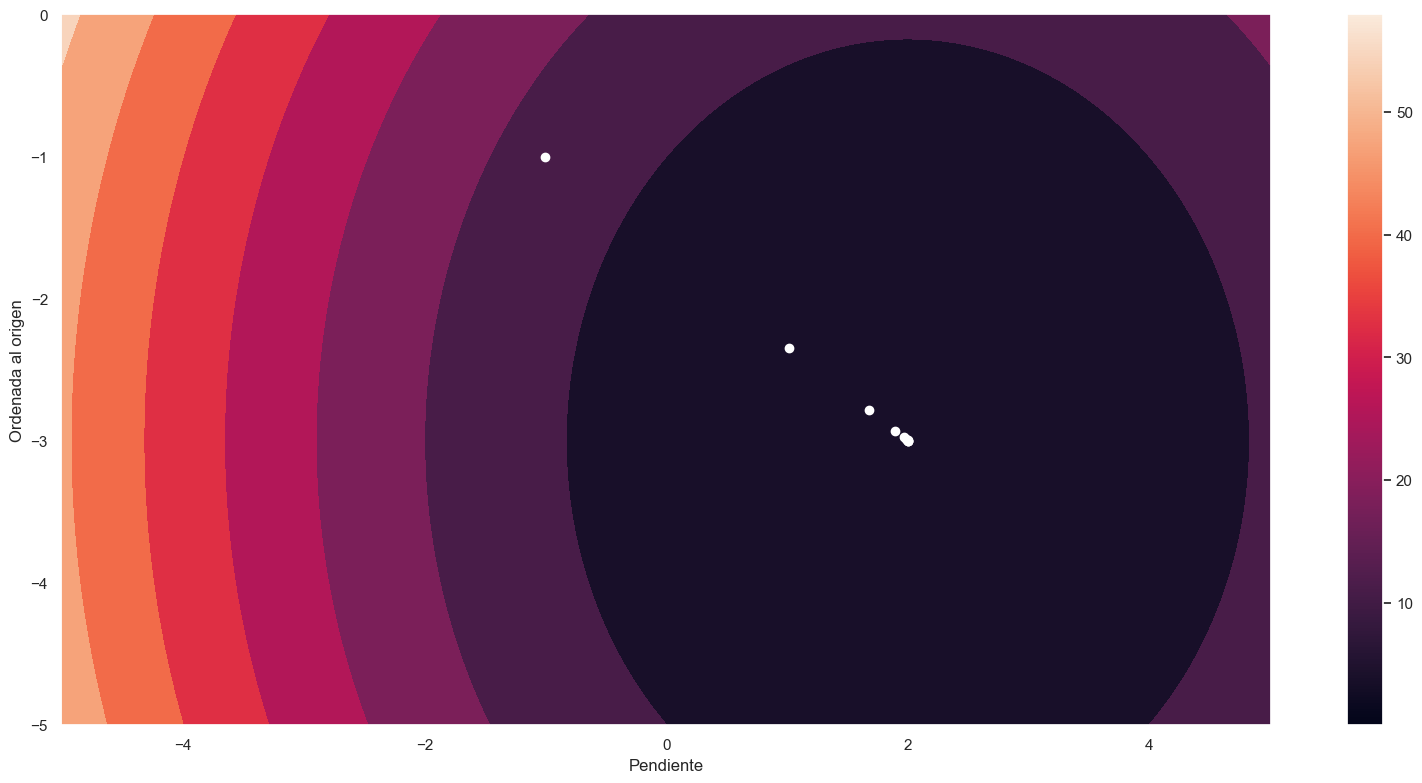

In [19]:
fig = plt.figure(figsize = (16,8))
ax = fig.gca()

plt.pcolormesh(Ms, Bs,MSE_m_y_b(Ms, Bs))
ax.contourf(Ms, Bs, MSE_m_y_b(Ms, Bs))
plt.colorbar()
plt.scatter(m_obtenidos[::5],b_obtenidos[::5], c="white") #notar que grafica cada 5 pasos
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.tight_layout()
plt.show()

In [20]:
x = np.linspace(-1,1,500)
y = np.sin(10*x)

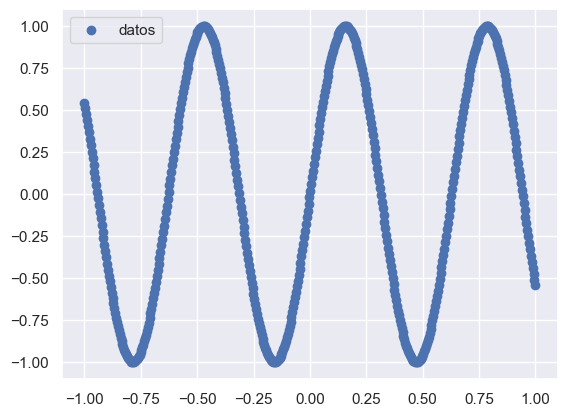

In [21]:
plt.scatter(x,y, label = 'datos')
plt.legend()
plt.show()

In [22]:
w_s = np.linspace(0,50,1000)
costos = []
for w in w_s:
    y_pred = np.sin(w*x)
    costos.append(MSE(y,y_pred))
costos = np.array(costos)

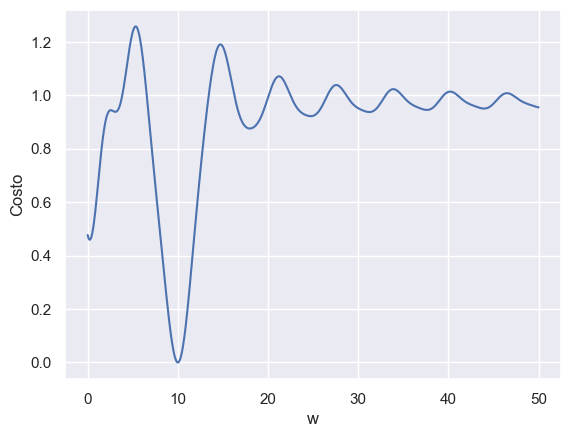

In [23]:
plt.plot(w_s, costos)
plt.xlabel('w')
plt.ylabel('Costo')
plt.show()

*Notar que hay muchos *mínimos locales* y un *mínimo absoluto*. En más dimensiones es fácil confundir un mínimo local con el mínimo que estamos buscando.*